<div class="alert alert-info">
<h2> Student's comment</h2>

Introduction: For this project, I will be analyzing provided data from Instacart to get an insight on customer's shopping habits. First, I will check for duplicates and clean the data for better analysis and interpretation. Questions like 'what are the 20 products? Most reordered items? Which items customers put in their carts first?, etc.' will be answered. I will including plots to better visualize  data trends and relationships. 
</div>



<font color='blue'>  </font>  

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_products=pd.read_csv('/datasets/products.csv', sep=';')
df_products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [3]:
df_aisles=pd.read_csv('/datasets/aisles.csv', sep=';')
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
df_department=pd.read_csv('/datasets/departments.csv', sep=';')
df_department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
df_order_products=pd.read_csv('/datasets/order_products.csv', sep=';')
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [6]:
df_orders=pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<div class="alert alert-info">
<h2> Student's comment</h2>
 
Conclusion: Our goal for this project is to gather information about customers' shopping behaviors by using PANDAS 
and data visualization. With the provided data sets, I used the head () method to get an overview of datas' columns 
and their names. 


<font color='blue'> </font>     

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
df_orders.info()
df_orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


15

In [8]:
# Check for all orders placed Wednesday at 2:00 AM
wed_at_two = df_orders[(df_orders['order_dow']==3) & (df_orders['order_hour_of_day']==2)]
wed_at_two

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [9]:
# Remove duplicate orders
df_orders=df_orders.drop_duplicates()

In [10]:
# Double check for duplicate rows
df_orders.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478952, dtype: bool

In [11]:
# Double check for duplicate order IDs only
df_orders['order_id'].duplicated().sum()

0

<div class="alert alert-info">
<h2> Student's comment</h2>


By using the info () method, it tells me that there are 478967 entries. To check for duplicates within the df_orders 
dataset, I used the duplicate() method. It tells us that there are 15 duplicates and those were removed with drop_duplicated().The dataset ends with 478952 rows. 

<font color='blue'> </font>  


### `products` data frame

In [12]:
# Check for fully duplicate rows
df_products.info()
df_products.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


0

In [13]:
# Check for just duplicate product IDs
df_products['product_id'].duplicated().sum()

0

 <div class="alert alert-info">
<h2> Student's comment</h2>

There are no duplicates.
</div>



<font color='blue'>  </font> 

In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
df_products['product_name'].str.lower().duplicated().sum()


1361

<div class="alert alert-info">
<h2> Student's comment</h2>

Product_name has 1361 duplicates.
</div>



<font color='blue'>  </font>


In [15]:
# Check for duplicate product names that aren't missing
df_products[~df_products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


<div class="alert alert-info">
<h2> Student's comment</h2>

df_products dataset has no fully duplicates rows. However, column 'product_name' has 1361 duplicates. 
</div>



<font color='blue'>  </font>


### `departments` data frame

In [16]:
df_department.info()
df_department.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [17]:
df_department.duplicated().sum()

0

<div class="alert alert-info">
<h2> Student's comment</h2>

df_department has no duplicates. 
</div>



<font color='blue'>  </font>

### `aisles` data frame

In [18]:
df_aisles.info()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [19]:
df_aisles.duplicated().sum()

0

<div class="alert alert-info">
<h2> Student's comment</h2>

df_aisles dataset also has no duplicates.
</div>



<font color='blue'>  </font>

### `order_products` data frame

In [20]:
# Check for fullly duplicate rows
df_order_products.duplicated().sum()

0

In [21]:
# Double check for any other tricky duplicates
df_order_products.nunique().sum()

495685

<div class="alert alert-info">
<h2> Student's comment</h2>

 df_order_products has no duplicates. 
</div>



<font color='blue'>  </font>

## Find and remove missing values


### `products` data frame

In [22]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [23]:
# Are all of the missing product names associated with Aisle ID 100?
df_products[(df_products['product_name'].isna())&(~df_products['aisle_id'] == 100)]

,product_id,product_name,aisle_id,department_id


In [24]:
# Are all of the missing product names associated with department ID 21?
df_products[(df_products['product_name'].isna()) & (df_products['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


In [25]:
# What is this ailse and department?
df_products[(df_products['aisle_id']!=100) & (df_products['department_id']!=21)]

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [26]:
# Fill missing product names with 'Unknown'
df_products['product_name']=df_products['product_name'].fillna('Unknown')

<div class="alert alert-info">
<h2> Student's comment</h2>
 There are no missing product names associated with asile ID 100 and department ID 21. There are 1258 (49694-48436) 
entries that are associated with either department_id 21 or aisle_id 100. Any missing product name is replaced with "unknown".
</div>



<font color='blue'>  </font>

### `orders` data frame

In [27]:
df_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [28]:
# Are there any missing values where it's not a customer's first order?
df_orders[df_orders['order_number']>1].isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

<div class="alert alert-info">
<h2> Student's comment</h2>

No missing values where it is not a customer's first order. 
</div>



<font color='blue'>  </font>

### `order_products` data frame

In [29]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [30]:
# What are the min and max values in this column?
df_order_product_min=df_order_products['add_to_cart_order'].min()
print(df_order_product_min)
df_order_product_max=df_order_products['add_to_cart_order'].max()
print(df_order_product_max)

1.0
64.0


<div class="alert alert-info">
<h2> Student's comment</h2>
The most customers have order in one cart is 64 products. The least is one product.     
</div>



<font color='blue'>  </font>

In [31]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
df_order_products[df_order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [32]:
# Do all orders with missing values have more than 64 products?
missing_values=df_order_products[df_order_products['add_to_cart_order'].isna()]
missing_values[missing_values['order_id'] >= 64].count()

order_id             836
product_id           836
add_to_cart_order      0
reordered            836
dtype: int64

<div class="alert alert-info">
<h2> Student's comment</h2>

There are 836 entries with a missing value in add_to_cart_order. Out of 836 entries, none of have more than 64 products. 
</div>



<font color='blue'>  </font>

In [33]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].fillna(value=999)
df_order_products['add_to_cart_order'].astype('int')

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [34]:
hours=df_orders['order_hour_of_day'].unique()
hours

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [35]:
days=df_orders['order_dow'].unique()
days

array([6, 5, 0, 4, 3, 1, 2])

<div class="alert alert-info">
<h2> Student's comment</h2>

For order_hour_of_day, it ranges from 0-23, 0 is 00:00:00 UTC which is equivalent to 12:00AM. 1 is 1:00AM, 2 is 2:00AM, etc.For order_dow, the day starts wuth 0=Sunday 1=Monday, 2=Tuesday, 3=Wednesday, 4=Thursday, 5=Friday, and 6=Saturday. 
</div>



<font color='blue'>  </font>

### [A2] What time of day do people shop for groceries?

<AxesSubplot:title={'center':'Time of the Day People Shop for Groceries'}, xlabel='Time'>

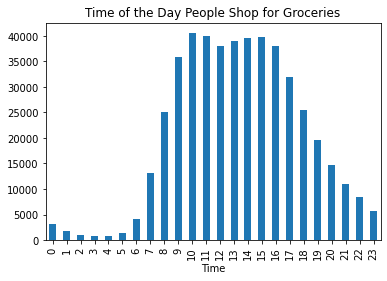

In [36]:
df_orders['order_hour_of_day'].value_counts().sort_index().plot(title='Time of the Day People Shop for Groceries',
                                                                xlabel='Time',
                                                                kind='bar')

<div class="alert alert-info">
<h2> Student's comment</h2>

People usually shop for their groceries at 10:00AM. The trend indicates that people prefer to shop for their groceries in the late afternoon and around noon. 
</div>



<font color='blue'>  </font>

### [A3] What day of the week do people shop for groceries?

<AxesSubplot:title={'center':'Day of the Week People Shop for Groceries'}, xlabel='Day of the week'>

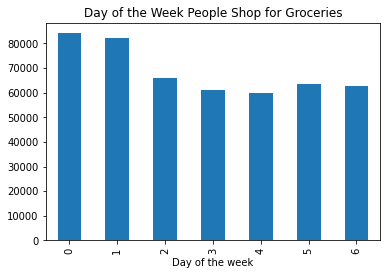

In [37]:
df_orders['order_dow'].value_counts().sort_index().plot(title='Day of the Week People Shop for Groceries',
                                                  xlabel='Day of the week',
                                                  kind='bar')

<div class="alert alert-info">
<h2> Student's comment</h2>

The majority of the people shop for groceries in the beginning of the week. Mostly on Sunday and Monday. Customers are less likely to shop in the middle of the week. 
</div>



<font color='blue'>  </font>

### [A4] How long do people wait until placing another order?

<AxesSubplot:title={'center':'How long people wait until placing another order'}, xlabel='Days people wait to place another order', ylabel='# of customers/Frequency'>

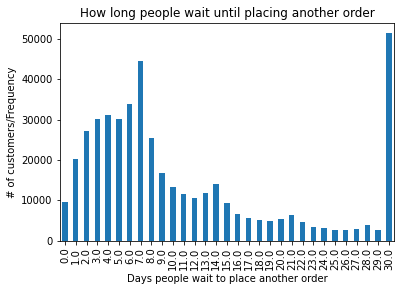

In [38]:
df_orders['days_since_prior_order'].value_counts().sort_index().plot(title='How long people wait until placing another order',
                                                                     ylabel='# of customers/Frequency',
                                                                     xlabel='Days people wait to place another order',
                                                                     kind='bar',)
                                                                


In [39]:
df_orders_min=df_orders['days_since_prior_order'].min()
print(df_orders_min)
df_orders_max=df_orders['days_since_prior_order'].max()
print(df_orders_max)

0.0
30.0


<div class="alert alert-info">
<h2> Student's comment</h2>

Majority of people (~50,000+) wait about a month to place another order. Then about ~45,000 people wait for 7 days before placing another order. 
</div>



<font color='blue'>  </font>

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [40]:
df_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [41]:
sats_order=df_orders[df_orders['order_dow']==6]
sats_order

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
11,102585,191558,18,6,16,8.0
14,2843219,74699,4,6,11,30.0
20,50934,178510,9,6,9,5.0
26,1844247,122558,4,6,18,30.0
...,...,...,...,...,...,...
478924,3274344,145367,13,6,10,13.0
478930,489820,7287,14,6,19,2.0
478943,548902,6829,3,6,10,30.0
478954,984024,47076,2,6,21,6.0


In [42]:
weds_order=df_orders[df_orders['order_dow']==3]
weds_order

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
6,2511640,148233,40,3,8,2.0
16,3109465,55090,19,3,15,9.0
28,133707,182261,1,3,10,NaN
30,1890318,193501,3,3,15,30.0
35,125325,106853,6,3,19,30.0
...,...,...,...,...,...,...
478917,972799,89702,4,3,7,10.0
478946,2406747,63101,11,3,8,5.0
478956,640934,27104,9,3,10,6.0
478963,3270802,112087,2,3,13,6.0


<function matplotlib.pyplot.show(close=None, block=None)>

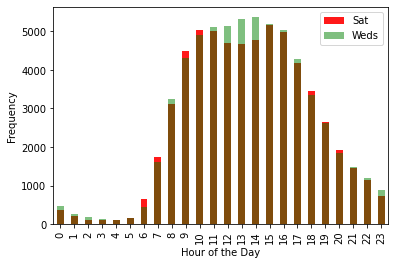

In [43]:
weds_order['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
                                                    x='order_hour_of_day',
                                                    xlabel='Hour of the Day',
                                                    ylabel='Frequency',
                                                    color='red',
                                                    alpha=0.9)
sats_order['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
                                                    x='order_hour_of_day',
                                                    xlabel='Hour of the Day',
                                                    ylabel='Frequency',
                                                    color='green',
                                                    alpha=.5)
plt.legend(['Sat','Weds'])
plt.show

<div class="alert alert-info">
<h2> Student's comment</h2>

Wednesday and Saturday's order_hour_of_the_day have the same distrubition. Customers usually order their groceries 
during the early morning and afternoon (9:00am -4:00pm). Eventhough they have the same distrubtion, more people order on Wednesday than on Saturday. 
</div>



<font color='blue'>  </font>

### [B2] What's the distribution for the number of orders per customer?

In [44]:
numb_order_cust=df_orders.groupby('user_id')['order_number'].count()
numb_order_cust.head(25),numb_order_cust.tail(25)


(user_id
 2      2
 4      2
 5      1
 6      2
 7      2
 10     1
 11     2
 12     1
 13     3
 14     4
 15     5
 16     3
 17     7
 19     2
 20     1
 21     3
 22     2
 23     1
 24     1
 25     1
 26     2
 27    10
 28     5
 29     1
 30     2
 Name: order_number, dtype: int64,
 user_id
 206182     2
 206183     1
 206184     2
 206185     1
 206186     1
 206187     5
 206188     2
 206189     3
 206190     1
 206191     1
 206193    12
 206194     1
 206195     4
 206196     1
 206197     4
 206198     2
 206199     3
 206200     3
 206201     4
 206202     3
 206203     1
 206206     7
 206207     5
 206208     9
 206209     2
 Name: order_number, dtype: int64)

<AxesSubplot:title={'center':'Number of orders per customer'}, xlabel='Number of order', ylabel='# of customers'>

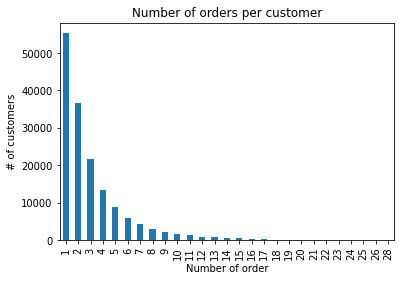

In [45]:
numb_order_cust.value_counts().sort_index().plot(kind='bar',
                                                 title='Number of orders per customer',
                                                 xlabel='Number of order',
                                                 ylabel='# of customers')
                                                 

<div class="alert alert-info">
<h2> Student's comment</h2>

 This is an exponential distribution. Most people only make 1 or 2 orders. 
</div>



<font color='blue'>  </font>

### [B3] What are the top 20 popular products (display their id and name)?

In [46]:
merged_products=df_order_products.merge(df_products)
merged_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17.0,0,Chicken Breast Tenders Breaded,129,1
1,147172,11440,7.0,1,Chicken Breast Tenders Breaded,129,1
2,3341719,11440,4.0,1,Chicken Breast Tenders Breaded,129,1
3,1938779,11440,8.0,1,Chicken Breast Tenders Breaded,129,1
4,1728338,11440,23.0,0,Chicken Breast Tenders Breaded,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14.0,0,Sweet Teriyaki Chicken Oven Sauce,5,13
4545003,2621676,25201,10.0,0,Crisp Waters Candle Scents,101,17
4545004,937623,49153,2.0,0,Shine Collection Brillance Shampoo,22,11
4545005,532895,8182,1.0,0,Total Mint Stripe Gel Toothpaste,20,11


In [47]:
top_20_prods=merged_products.groupby('product_id')['product_name'].value_counts().sort_values(ascending=False)
top_20_prods.head(20)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: product_name, dtype: int64

<div class="alert alert-info">
<h2> Student's comment</h2>

Our top product is banana with 66,050 orders, follows by bag of organic bananas and organic oranges. Our top 20 products are either vegetables or fruits. 
</div>



<font color='blue'>  </font>

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [48]:
items_per_order=df_order_products.groupby('order_id')['add_to_cart_order'].count()
items_per_order

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: add_to_cart_order, Length: 450046, dtype: int64

In [49]:
items_per_order.value_counts()

5      31923
6      31698
4      31054
7      30822
3      29046
       ...  
80         1
87         1
85         1
72         1
127        1
Name: add_to_cart_order, Length: 90, dtype: int64

<AxesSubplot:title={'center':'Number of items customer buy per order'}, xlabel='items per order'>

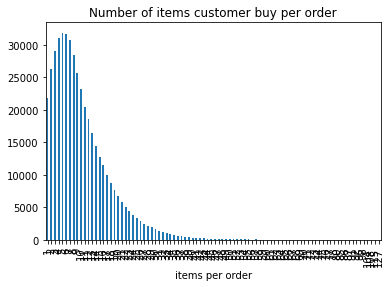

In [50]:
items_per_order.value_counts().sort_index().plot(kind='bar',
                                                 x='add_to_cart_order',
                                                 title='Number of items customer buy per order',
                                                 xlabel='items per order')

<div class="alert alert-info">
<h2> Student's comment</h2>

Most people purchase 4-6 items per order (more than 30,000 customers). Only one customer purchase 127 items, which is the highest number of items per order from the collected data. 
</div>



<font color='blue'>  </font>

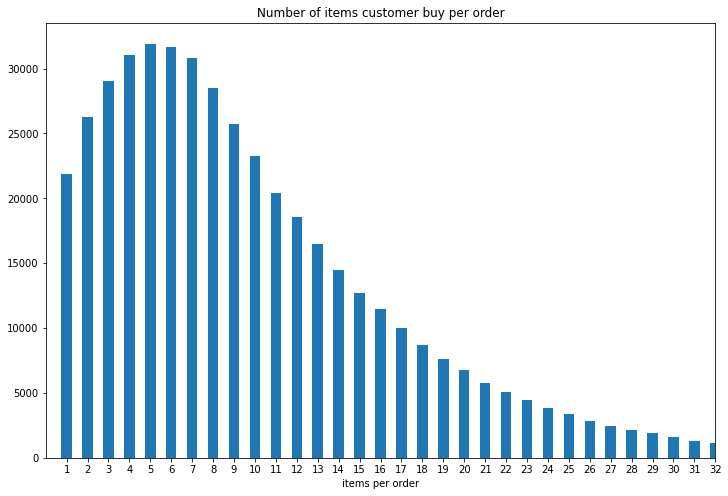

In [51]:
# Reviewer's code

items_per_order.value_counts().sort_index().plot(kind='bar',
                                                 x='add_to_cart_order',
                                                 title='Number of items customer buy per order',
                                                 xlabel='items per order',
                                                figsize=(12,8))

plt.xlim(-1,31)  # I use -1 to have more space
plt.xticks(rotation=0);

In [52]:
# [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [53]:
merged_products=df_order_products.merge(df_products)
merged_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17.0,0,Chicken Breast Tenders Breaded,129,1
1,147172,11440,7.0,1,Chicken Breast Tenders Breaded,129,1
2,3341719,11440,4.0,1,Chicken Breast Tenders Breaded,129,1
3,1938779,11440,8.0,1,Chicken Breast Tenders Breaded,129,1
4,1728338,11440,23.0,0,Chicken Breast Tenders Breaded,129,1


In [54]:
grp=merged_products.groupby(['product_id','product_name'])
agg_dict={'reordered': 'sum'}
top_reordered=grp.agg(agg_dict)
top_reordered

,,reordered
product_id,product_name,
1,Chocolate Sandwich Cookies,158
2,All-Seasons Salt,0
3,Robust Golden Unsweetened Oolong Tea,31
4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,25
7,Pure Coconut Water With Orange,1
...,...,...
49690,HIGH PERFORMANCE ENERGY DRINK,4
49691,ORIGINAL PANCAKE & WAFFLE MIX,31
49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,5


In [55]:
top_reordered.sort_values(by='reordered', ascending=False).reset_index().head(20)


,product_id,product_name,reordered
0,24852,Banana,55763
1,13176,Bag of Organic Bananas,44450
2,21137,Organic Strawberries,28639
3,21903,Organic Baby Spinach,26233
4,47209,Organic Hass Avocado,23629
5,47766,Organic Avocado,18743
6,27845,Organic Whole Milk,16251
7,47626,Large Lemon,15044
8,27966,Organic Raspberries,14748
9,16797,Strawberries,13945


<div class="alert alert-info">
<h2> Student's comment</h2>

Top 20 reordered items are mostly vegetables and fruits, especially organic products. Banana is the number
reordered product with 55763 times and organic half and half is the least reordered item in the top 20.
</div>



<font color='blue'>  </font>

### [C3] For each product, what proportion of its orders are reorders?

In [56]:
merged_products=df_order_products.merge(df_products)
merged_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17.0,0,Chicken Breast Tenders Breaded,129,1
1,147172,11440,7.0,1,Chicken Breast Tenders Breaded,129,1
2,3341719,11440,4.0,1,Chicken Breast Tenders Breaded,129,1
3,1938779,11440,8.0,1,Chicken Breast Tenders Breaded,129,1
4,1728338,11440,23.0,0,Chicken Breast Tenders Breaded,129,1


In [57]:
reordered=merged_products.groupby(['product_id','product_name'])['reordered'].sum()
reordered

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           158
2           All-Seasons Salt                                                       0
3           Robust Golden Unsweetened Oolong Tea                                  31
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce     25
7           Pure Coconut Water With Orange                                         1
                                                                                ... 
49690       HIGH PERFORMANCE ENERGY DRINK                                          4
49691       ORIGINAL PANCAKE & WAFFLE MIX                                         31
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                        5
49693       SPRING WATER BODY WASH                                                11
49694       BURRITO- STEAK & CHEESE                                     

In [58]:
sum_reordered=merged_products['reordered'].sum()

In [59]:
prop_reorder=reordered/sum_reordered *100
prop_reorder.sort_values(ascending=False)

product_id  product_name                           
24852       Banana                                     2.077733
13176       Bag of Organic Bananas                     1.656210
21137       Organic Strawberries                       1.067091
21903       Organic Baby Spinach                       0.977443
47209       Organic Hass Avocado                       0.880418
                                                         ...   
37593       Medicated Calamine Lotion                  0.000000
14775       FreshBurst® Antiseptic Adult Mouthwash     0.000000
37596       Shredded Chicken & Chicken Liver Recipe    0.000000
14774       Ready Rice Red Beans & Rice                0.000000
13714       Oregano- Ground                            0.000000
Name: reordered, Length: 45573, dtype: float64

<div class="alert alert-info">
<h2> Student's comment</h2>

Banana is the most reordered item at 2%, follows by organic banana and stawberries. 
</div>



<font color='blue'> This code is used to change text color. </font>  

In [72]:
# Reviewer's code

ct = merged_products.groupby(['product_id','product_name'])['reordered'].count()

merged_products.groupby(['product_id','product_name'])['reordered'].sum()/ct

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

In [73]:
# Reviewer's code

merged_products.groupby(['product_id','product_name'])['reordered'].mean()

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

### [C4] For each customer, what proportion of their products ordered are reorders?

In [74]:
merged_orders=df_order_products.merge(df_orders)
merged_orders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17.0,0,58454,25,0,15,8.0
1,2141543,31869,15.0,1,58454,25,0,15,8.0
2,2141543,30233,9.0,1,58454,25,0,15,8.0
3,2141543,27966,20.0,1,58454,25,0,15,8.0
4,2141543,13176,2.0,1,58454,25,0,15,8.0


In [75]:
cust_reorder=merged_orders.groupby(['user_id','product_id'])['reordered'].sum()
cust_reorder

user_id  product_id
2        9681          0
         12000         0
         13176         0
         16589         0
         20574         0
                      ..
206209   39216         0
         40992         0
         41213         1
         41665         0
         43961         0
Name: reordered, Length: 3381866, dtype: int64

In [76]:
count_reordered=merged_orders['reordered'].sum()
count_reordered

2683838

In [77]:
(cust_reorder/count_reordered *100).sort_values(ascending=False)

user_id  product_id
87130    27845         0.000857
193164   39877         0.000782
59819    35914         0.000745
135867   10749         0.000745
76764    28204         0.000745
                         ...   
92864    28281         0.000000
         27356         0.000000
         23909         0.000000
         19805         0.000000
206209   43961         0.000000
Name: reordered, Length: 3381866, dtype: float64

In [78]:
# Reviewer's code


merged_orders.groupby('user_id')['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

### [C5] What are the top 20 items that people put in their carts first? 

In [122]:
merged_products=df_order_products.merge(df_products)
merged_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17.0,0,Chicken Breast Tenders Breaded,129,1
1,147172,11440,7.0,1,Chicken Breast Tenders Breaded,129,1
2,3341719,11440,4.0,1,Chicken Breast Tenders Breaded,129,1
3,1938779,11440,8.0,1,Chicken Breast Tenders Breaded,129,1
4,1728338,11440,23.0,0,Chicken Breast Tenders Breaded,129,1


In [123]:
top_items=merged_products[merged_products['add_to_cart_order']==1].groupby('product_id')['product_name'].value_counts()
top_items

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           47
2           All-Seasons Salt                                                      2
3           Robust Golden Unsweetened Oolong Tea                                  5
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce     1
8           Cut Russet Potatoes Steam N' Mash                                     4
                                                                                 ..
49687       Smartblend Healthy Metabolism Dry Cat Food                            1
49688       Fresh Foaming Cleanser                                                1
49690       HIGH PERFORMANCE ENERGY DRINK                                         2
49691       ORIGINAL PANCAKE & WAFFLE MIX                                         3
49693       SPRING WATER BODY WASH                                                

In [124]:
top_20_items=top_items.sort_values(ascending=False).head(20)
top_20_items

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

<div class="alert alert-info">
<h2> Student's comment</h2>

Banana and bag of organic bananas are the top items that people put in their carts. Above list is the 20 items. Bananas
and organic fruits/vegetables are the most popular items across the board (most popular, top reordered, and first items
to be put in the cart).
</div>



<font color='blue'>  </font>

<div class="alert alert-info">
<h2> Student's comment</h2>

Conclusion: Instacart is an online delivery and pick up service that deliver groceries to your home. With the collected and analyzed data by using PANDAS, we can infer that shoppers mostly use this service to order fresh fruits and produces, especially organic fruits. Banana is the most popular ordered and reordered item. Non-food items are less likely to be ordered. Reordered of groceries are made in the next 30 days or 7 days and in the late morning and afternoon. 
</div>



<font color='blue'> This code is used to change text color. </font>
